# Understanding ROC and Lift Curves

    Calculate performance of Naive Bayes for spotify dataset on any two classes since the ROC and lift curves can only be drawn for binary classification problems).

** Considering ```[dinner]``` as positive class and rest as negative **

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
#modify the data as per above consideration
spotify = pd.read_csv('spotify_clean.csv')

spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,moods
0,0.838,0.602,475680,0.302,0.9070,8,0.1130,-11.627,1,0.0427,119.758,4,0.300,dinner
1,0.873,0.571,290293,0.346,0.5190,0,0.0980,-12.569,0,0.0409,93.885,4,0.687,dinner
2,0.876,0.427,291862,0.287,0.8740,11,0.1330,-19.834,1,0.0346,104.407,4,0.467,dinner
3,0.714,0.644,340693,0.205,0.0482,10,0.0510,-16.005,1,0.0397,118.314,4,0.411,dinner
4,0.703,0.532,482360,0.364,0.6180,9,0.0602,-13.068,0,0.0297,127.166,4,0.271,dinner


In [4]:
spotify.moods.value_counts()

dinner            467
sleep             362
workout           310
party             225
party, workout     52
Name: moods, dtype: int64

In [5]:
#reassign the target and features columns
y = spotify['moods']
x = spotify[spotify.columns.values[:-1]]

In [6]:
y.value_counts()

dinner            467
sleep             362
workout           310
party             225
party, workout     52
Name: moods, dtype: int64

In [7]:
idx = y.index[y.isin(['sleep','workout','party','party, workout'])]
idx

Int64Index([ 467,  468,  469,  470,  471,  472,  473,  474,  475,  476,
            ...
            1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415],
           dtype='int64', length=949)

In [8]:
y.loc[idx] = 'other'

C:\Users\Gurpreet\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
y.value_counts()

other     949
dinner    467
Name: moods, dtype: int64

In [12]:
#create train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33,stratify=y)

### Draw the ROC curves for the Naïve Bayes performance 

In [13]:
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB

In [14]:
nbclf = GaussianNB()

nbclf.fit(xtrain,ytrain)
pred_train = nbclf.predict(xtrain)
pred = nbclf.predict(xtest)

pred_prob_train = nbclf.predict_proba(xtrain)[:,1]
pred_prob = nbclf.predict_proba(xtest)[:,1]

In [15]:
fpr_tr,tpr_tr,thresh_tr = roc_curve(np.array(ytrain),pred_prob_train,pos_label='dinner')
fpr,tpr,thresh = roc_curve(np.array(ytest),pred_prob,pos_label='dinner')

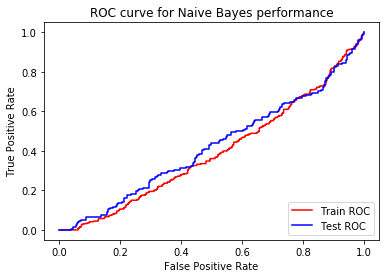

In [16]:

plt.plot(fpr_tr,tpr_tr,'r',label='Train ROC')
plt.plot(fpr,tpr,'b',label='Test ROC')
plt.title('ROC curve for Naive Bayes performance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The test ROC is best when both TPR and FPR are around 0.4. At this point, the naive bayes performance is best. 

### Draw Lift Curves for Naive Bayes on Train and Test data

In [17]:
import scikitplot as skplot

In [18]:
pred_prob = nbclf.predict_proba(xtest)

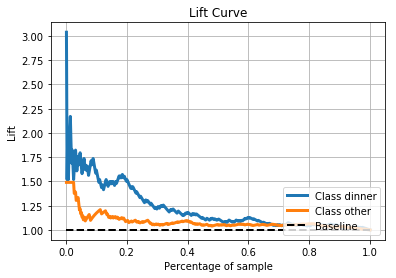

In [19]:
skplot.metrics.plot_lift_curve(ytest,pred_prob)

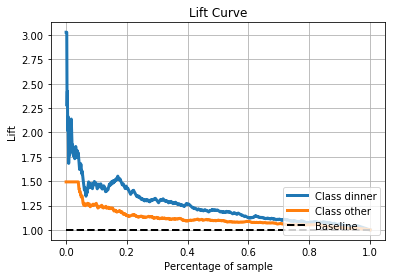

In [20]:
pred_prob_train = nbclf.predict_proba(xtrain)
skplot.metrics.plot_lift_curve(ytrain, pred_prob_train)